In [6]:
%matplotlib inline
import matplotlib.pyplot as plt
from  matplotlib import pyplot
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB
import seaborn as sns
from sklearn.neighbors import KNeighborsClassifier
from sklearn import metrics


In [7]:
df= pd.read_csv('./données/Aggregation.txt',sep="\t",header=None)
df.columns = ["V1", "V2", "Y"]
df.head()
np.unique(df["Y"])

array([1, 2, 3, 4, 5, 6, 7], dtype=int64)

In [5]:
df.head()

,V1,V2,Y
0,31.95,7.95,3
1,31.15,7.30,3
2,30.45,6.65,3
3,29.70,6.00,3
4,28.90,5.55,3


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 240 entries, 0 to 239
Data columns (total 3 columns):
V1    240 non-null float64
V2    240 non-null float64
Y     240 non-null int64
dtypes: float64(2), int64(1)
memory usage: 5.8 KB


In [6]:
df.describe()

,V1,V2,Y
count,240.000000,240.000000,240.000000
mean,7.323750,20.928542,1.637500
std,3.202509,3.383390,0.481727
min,0.500000,14.450000,1.000000
25%,5.250000,18.237500,1.000000
50%,7.300000,20.775000,2.000000
75%,9.312500,23.562500,2.000000
max,14.200000,27.800000,2.000000


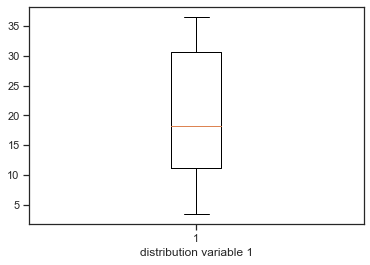

In [3]:
fig = plt.figure()
plt.boxplot(df['V1'])
plt.xlabel('distribution variable 1' )
plt.show()

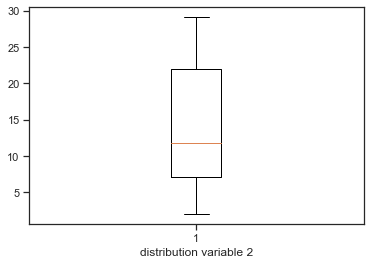

In [4]:
fig = plt.figure()
plt.boxplot(df['V2'])
plt.xlabel('distribution variable 2' )
plt.show()

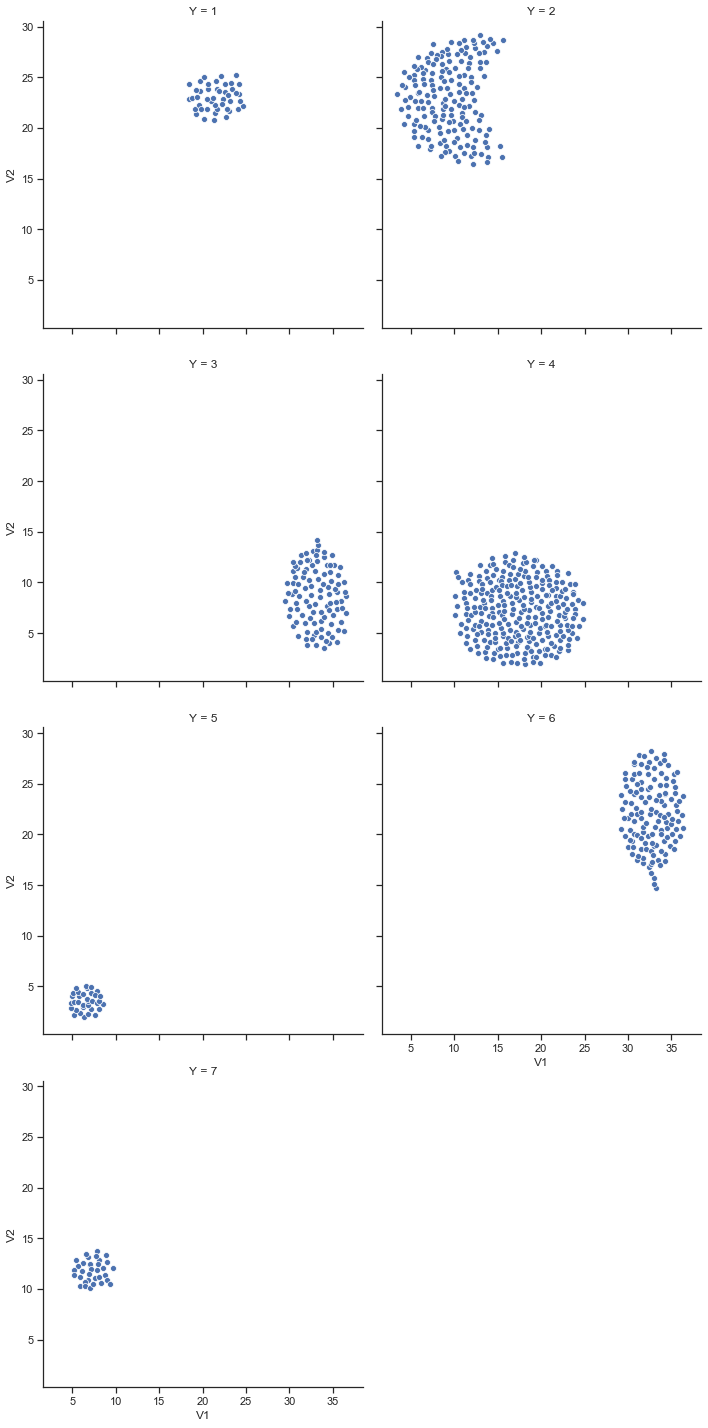

In [13]:
sns.relplot(x="V1", y="V2", col='Y',data=df,col_wrap=2);

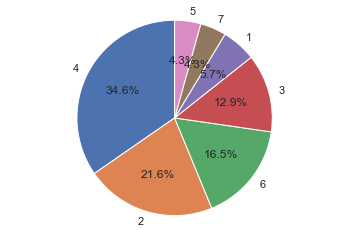

In [16]:
t=df['Y'].value_counts()
ind=t.index
t=t.reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.pie(t, labels=ind,  autopct='%1.1f%%', startangle=90)
ax1.axis('equal') 
plt.show()

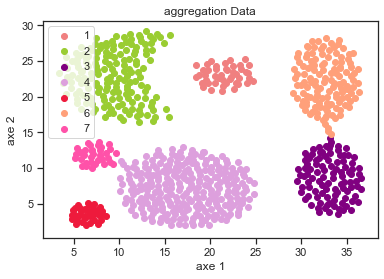

In [44]:
color_map = {0: '#F08080', 1: "yellowgreen", 2:  'purple',3:"#DDA0DD",4:"#EE1A3C",5:"#FFA07A",6:"#FF52A9"}
for idx, cl in enumerate(np.unique(df['Y'])):
     
            plt.scatter(x=df.loc[df['Y'] == cl, "V1"], y=df.loc[df['Y'] == cl, "V2"],
                    c=color_map[idx], marker='o', label=cl)
            plt.xlabel('axe 1')
            plt.ylabel('axe 2')
            plt.legend(loc='upper left')
            plt.title('aggregation Data')
plt.show()




puisque nous avons les données non équilibré nous devons appliquer une des techniques utilisées pour ce type des données qui se présentent dans la méthode under-sampling ,over-sampling, EasyEnsemble RandomUnderSampler BalanceCascade 
Les techniques de rééchantillonnage sont divisées en deux catégories:
* Sous-échantillonnage de la ou des classes majoritaires.
* Suréchantillonnage de la classe minoritaire.
* Combiner le sur et sous-échantillonnage.
* Créez des ensembles équilibrés d'ensemble.
* 
- https://github.com/scikit-learn-contrib/imbalanced-learn

pour notre cas nous avons décidé d'utiliser la technique qui prend en compte les deux méthodes (under / over) parce que faire seulement l'échantillonnage pour équilibrer la classe minoritaire peut supprimer des individus porteurs d'informations, et de 
même ajouter d'autres individus pour équilibrer la classe majoritaire peut être non significatif des cas

In [56]:
from imblearn.combine import SMOTETomek
SMT = SMOTETomek(random_state=0)
X_smt, Y_smt = SMT.fit_resample(df[["V1","V2"]].values, df.Y.values)

In [57]:
dff=pd.DataFrame(X_smt)   
dff.columns=['V1','V2']
dff['Y']=Y_smt

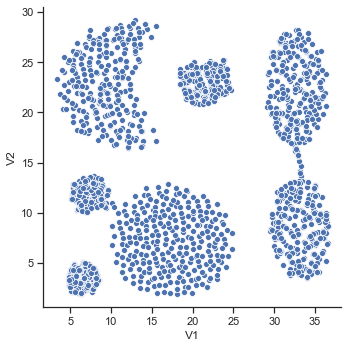

In [59]:
sns.relplot(x="V1", y="V2", data=dff);

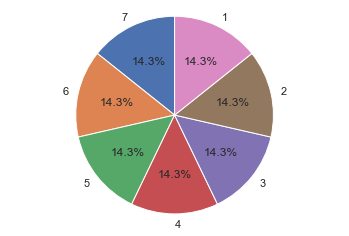

In [61]:
t1=dff['Y'].value_counts()
ind1=t1.index
t1=t1.reset_index(drop=True)
fig1, ax1 = plt.subplots()
ax1.pie(t1, labels=ind1, autopct='%1.1f%%',
         startangle=90)
ax1.axis('equal') 
plt.show()

Data modeling

In [55]:
from sklearn.naive_bayes import GaussianNB
from sklearn.neighbors import KNeighborsClassifier
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis as LDA
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis as QDA
from sklearn import svm
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import VotingClassifier 
from sklearn.metrics import accuracy_score
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedKFold
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import GridSearchCV

Using TensorFlow backend.


In [62]:
X_train, X_test, y_train, y_test = train_test_split(dff[['V1','V2']],dff['Y'], test_size=0.02, random_state=0)

In [63]:
grid={"C":np.logspace(-3,3,7), "penalty":["l1","l2"]}# l1 lasso l2 ridge
logreg=LogisticRegression()
logreg_cv=GridSearchCV(logreg,grid,cv=10)
logreg_cv.fit(X_train,y_train)

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:536: FitFailedWarning: Estimator fit failed. The score on this train-test partition for these parameters will be set to nan. Details: 
ValueError: Solver lbfgs supports only 'l2' or 'none' penalties, got l1 penalty.

  FitFailedWarning)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTA

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
C:\Users\majda\Anaconda3\lib\site-packages\sklearn\linear_model\_logistic.py:939: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html.
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-r

GridSearchCV(cv=10, error_score=nan,
             estimator=LogisticRegression(C=1.0, class_weight=None, dual=False,
                                          fit_intercept=True,
                                          intercept_scaling=1, l1_ratio=None,
                                          max_iter=100, multi_class='auto',
                                          n_jobs=None, penalty='l2',
                                          random_state=None, solver='lbfgs',
                                          tol=0.0001, verbose=0,
                                          warm_start=False),
             iid='deprecated', n_jobs=None,
             param_grid={'C': array([1.e-03, 1.e-02, 1.e-01, 1.e+00, 1.e+01, 1.e+02, 1.e+03]),
                         'penalty': ['l1', 'l2']},
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [64]:
data = {'Algorithme':['Reg Log'],'Accuracy':[logreg_cv.best_score_]}
models_dataframe=pd.DataFrame.from_dict(data)
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664


In [65]:
#GaussianNB().get_params().keys()
gnb = GaussianNB()
y_predNB = gnb.fit(X_train, y_train).predict(X_test)

In [67]:
models_dataframe.loc[1] = {'Algorithme':'NB','Accuracy': accuracy_score(y_predNB,y_test)}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000


K Nearest Neighbors

In [68]:
k_range = range(1,26)
scores = {}
scores_list = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors = k)
    y_pred = knn.fit(X_train, y_train).predict(X_test)
    scores[k] = metrics.accuracy_score(y_test, y_pred)
    scores_list.append(metrics.accuracy_score(y_test, y_pred))

Text(0, 0.5, 'Testing Accuracy')

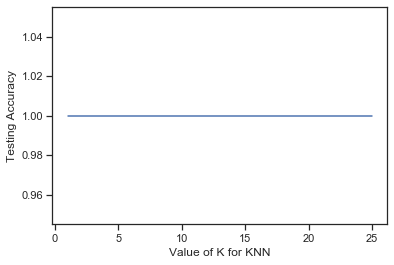

In [69]:
plt.plot(k_range,scores_list)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [72]:
skf = StratifiedKFold(n_splits=3)
knn = KNeighborsClassifier(n_neighbors = 12)
scores=cross_val_score(knn,X_train, y_train, cv=skf)

In [73]:
scores

array([0.99679487, 0.99839744, 1.        ])

In [74]:
models_dataframe.loc[2] = {'Algorithme':'KNN','Accuracy': scores.mean()}

In [75]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397


In [76]:
lda = LDA(n_components=2)
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(lda, X_train, y_train, cv=skf)

In [77]:
models_dataframe.loc[3] = {'Algorithme':'LDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397
3,LDA,0.985577


In [78]:
qda = QDA()
skf = StratifiedKFold(n_splits=5)
score = cross_val_score(qda, X_train, y_train, cv=skf)

In [79]:
models_dataframe.loc[4] = {'Algorithme':'QDA','Accuracy': score.mean()}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397
3,LDA,0.985577
4,QDA,0.998933


In [80]:
parameter_candidates = [
  {'C': [1, 10, 100, 1000], 'kernel': ['linear']}
  #{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']},
]

In [81]:
parameter = [
  {'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001], 'kernel': ['rbf']}
]

In [82]:
skf = StratifiedKFold(n_splits=5)
svmLN = GridSearchCV(estimator=svm.SVC(), param_grid=parameter_candidates, cv=skf)
svmLN.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'kernel': ['linear']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [83]:
print('Best C:',svmLN.best_estimator_.C) 
print('Best Kernel:',svmLN.best_estimator_.kernel)

Best C: 10
Best Kernel: linear


In [84]:
models_dataframe.loc[5] = {'Algorithme':'SVM Linear','Accuracy': svmLN.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397
3,LDA,0.985577
4,QDA,0.998933
5,SVM Linear,1.000000


In [85]:
skf = StratifiedKFold(n_splits=5)
svmrbf = GridSearchCV(estimator=svm.SVC(), param_grid=parameter, cv=skf)
svmrbf.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=SVC(C=1.0, break_ties=False, cache_size=200,
                           class_weight=None, coef0=0.0,
                           decision_function_shape='ovr', degree=3,
                           gamma='scale', kernel='rbf', max_iter=-1,
                           probability=False, random_state=None, shrinking=True,
                           tol=0.001, verbose=False),
             iid='deprecated', n_jobs=None,
             param_grid=[{'C': [1, 10, 100, 1000], 'gamma': [0.001, 0.0001],
                          'kernel': ['rbf']}],
             pre_dispatch='2*n_jobs', refit=True, return_train_score=False,
             scoring=None, verbose=0)

In [86]:
models_dataframe.loc[6] = {'Algorithme':'SVM RBF','Accuracy': svmrbf.best_score_}
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397
3,LDA,0.985577
4,QDA,0.998933
5,SVM Linear,1.000000
6,SVM RBF,1.000000


In [87]:
tree_para = {'criterion':['gini','entropy'],'max_depth':[2,4,5,6,7,8,9,10,11,12,15,20]}
skf = StratifiedKFold(n_splits=5)
dtc = GridSearchCV(DecisionTreeClassifier(), tree_para, cv=skf)
dtc.fit(X_train, y_train)

GridSearchCV(cv=StratifiedKFold(n_splits=5, random_state=None, shuffle=False),
             error_score=nan,
             estimator=DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None,
                                              criterion='gini', max_depth=None,
                                              max_features=None,
                                              max_leaf_nodes=None,
                                              min_impurity_decrease=0.0,
                                              min_impurity_split=None,
                                              min_samples_leaf=1,
                                              min_samples_split=2,
                                              min_weight_fraction_leaf=0.0,
                                              presort='deprecated',
                                              random_state=None,
                                              splitter='best'),
             iid='deprecated', n_jobs=None,
     

In [88]:
models_dataframe.loc[7] = {'Algorithme':'Tree D','Accuracy': dtc.best_score_}

In [89]:
models_dataframe

,Algorithme,Accuracy
0,Reg Log,0.994664
1,NB,1.000000
2,KNN,0.998397
3,LDA,0.985577
4,QDA,0.998933
5,SVM Linear,1.000000
6,SVM RBF,1.000000
7,Tree D,1.000000


Random forest

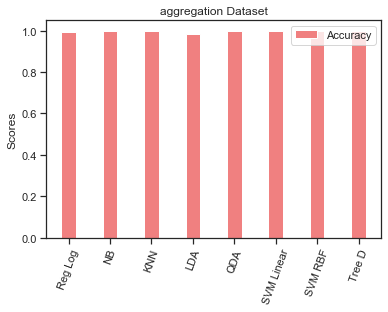

In [91]:

labels=models_dataframe.Algorithme.values
x = np.arange(len(models_dataframe.Algorithme.values ))  # the label locations
width = 0.35  # the width of the bars
fig, ax = plt.subplots()
rects2 = ax.bar(x, models_dataframe.Accuracy.values , width, label='Accuracy',color='#F08080')
ax.set_ylabel('Scores')
ax.set_title('aggregation Dataset')
ax.set_xticks(x)
ax.set_xticklabels(labels,rotation=70)
ax.legend()